In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path = 'data/train'
data_train_test = 'data/test'
data_train_validation = 'data/validation'

In [3]:
image_width = 180
image_height = 180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(image_width,image_height),
    batch_size=32,
    validation_split=False
)

Found 3125 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names
print(data_cat)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_train_validation,
    image_size=(image_width,image_height),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_train_test,
    image_size=(image_width,image_height),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

Found 359 files belonging to 36 classes.


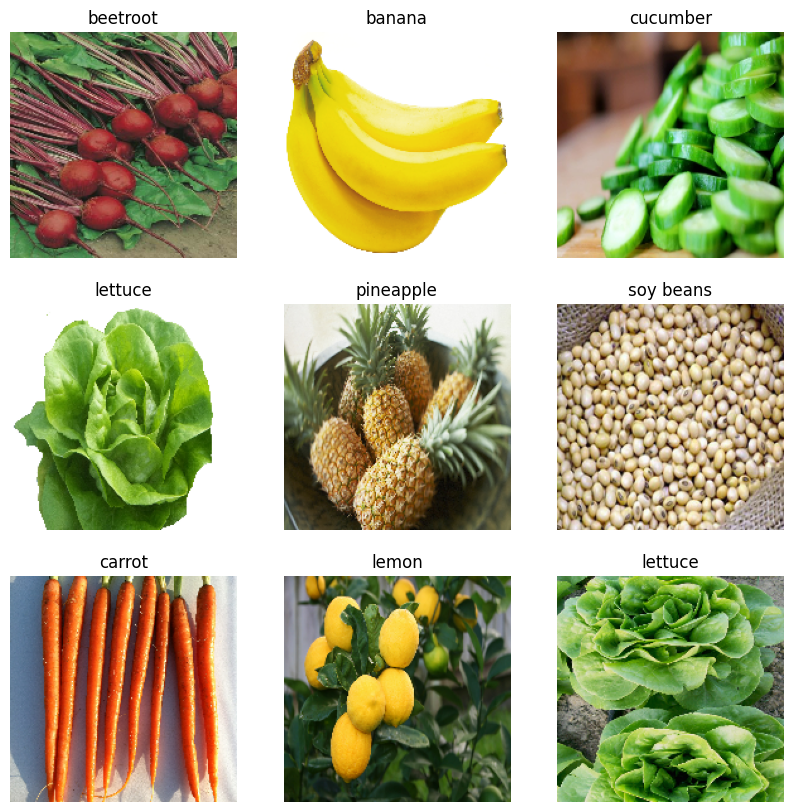

In [8]:
plt.figure(figsize=(10,10))
for images, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [9]:
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [10]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
epochs_size = 30
history = model.fit(
    data_train,
    validation_data=data_val,
    epochs=epochs_size,
)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 249ms/step - accuracy: 0.9825 - loss: 0.0908 - val_accuracy: 0.9658 - val_loss: 0.3513
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.9802 - loss: 0.0841 - val_accuracy: 0.9601 - val_loss: 0.3308
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 227ms/step - accuracy: 0.9836 - loss: 0.0789 - val_accuracy: 0.9573 - val_loss: 0.3535
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 336ms/step - accuracy: 0.9842 - loss: 0.0730 - val_accuracy: 0.9573 - val_loss: 0.3345
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 342ms/step - accuracy: 0.9809 - loss: 0.0723 - val_accuracy: 0.9630 - val_loss: 0.3545
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 390ms/step - accuracy: 0.9797 - loss: 0.0847 - val_accuracy: 0.9601 - val_loss: 0.4068
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 377ms/step - accuracy: 0.9800 - loss: 0.0862 - val_accuracy: 0.9601 - val_loss: 0.3951
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 388ms/step - accuracy: 0.9791 - loss: 0.0812 - val_accu

Text(0.5, 1.0, 'Training and Validation Loss')

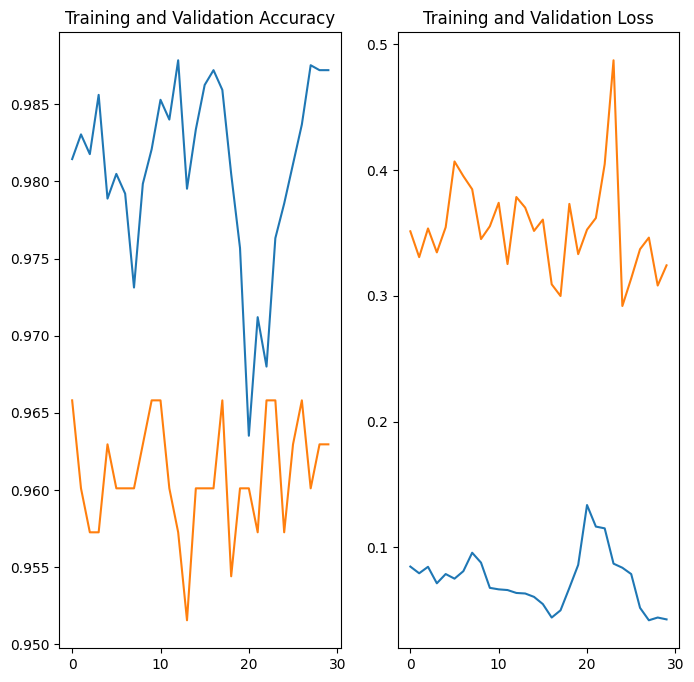

In [43]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label="Training Accuracy")
plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label="Training Loss")
plt.plot(epochs_range, history.history['val_loss'], label="Validation Loss")
plt.title('Training and Validation Loss')

In [51]:
image = 'data/image_four.jpg'
image = tf.keras.utils.load_img(image, target_size=(image_width,image_height))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [52]:
predict = model.predict(img_bat)
print(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[ -6.541076   -0.562714  -12.506084   -2.4695675   1.0019132   1.2822989
  -13.505132    5.348861    0.5401287  11.786279   10.432022   -3.6809413
   -1.1154479   2.4374962   8.116648   -0.8739888   6.6004505   1.4854491
    4.6147      2.0086777  -4.5870237  -3.0728867  -5.8077507   4.249692
    6.9539976   1.4945192  -5.519746   -5.9104447  -9.514896    5.268561
    9.570261    9.837783   -9.051878   -9.588135   -9.621157   -2.6654098]]


In [53]:
score = tf.nn.softmax(predict)
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 64.38


In [54]:
model.save('models/training_fruit_vegetable_recognition_model_version_two.keras')